In [13]:
import ElementsEnv
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt

%erun Phosphoros 1.1

from PhzCLI.PlotSpecZComparison import compute_stats

In [34]:
truth = Table.read('/home/aalvarez/Work/Data/NNPZ/WillShifts/filter_shift_test_sample.fits')
reference = Table.read('/home/aalvarez/Work/Data/NNPZ/WillShifts/reference.fits', hdu=1)
corrected = Table.read('/home/aalvarez/Work/Data/NNPZ/WillShifts/shifted_corrected.fits', hdu=1)
not_corrected = Table.read('/home/aalvarez/Work/Data/NNPZ/WillShifts/shifted_not_corrected.fits', hdu=1)
corrected_recomp = Table.read('/home/aalvarez/Work/Data/NNPZ/WillShifts/shifted_corrected_recomputed.fits', hdu=1)

In [35]:
def stats_nan(catalog):
    nan_mask = ~np.isnan(catalog['REDSHIFT_MEAN'])
    cross = join(catalog[nan_mask], truth, 'ID')
    compute_stats(cross['z'], cross['REDSHIFT_MEAN'])
    return cross

In [36]:
ref_c = stats_nan(reference)

/opt/miniconda3/envs/phz/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


--> Mean                :  -0.08699741746197528
--> Median              :  -0.016464639455080032
--> Sigma               :  0.22259485591360142
--> Mad                 :  0.02633119747042656
--> Outliers            :  12.207935157852605 %
--> Sigma (no outliers) :  0.028941344


In [37]:
corr_c = stats_nan(corrected)

--> Mean                :  -0.08905051008865049
--> Median              :  -0.01870119571685791
--> Sigma               :  0.22237179803866952
--> Mad                 :  0.027624014765024185
--> Outliers            :  12.360338694323364 %
--> Sigma (no outliers) :  0.029358162


In [38]:
uncorr_c = stats_nan(not_corrected)

--> Mean                :  -0.09107061687168136
--> Median              :  -0.023242568597197533
--> Sigma               :  0.22112622039863683
--> Mad                 :  0.02817363105714321
--> Outliers            :  12.202574763312127 %
--> Sigma (no outliers) :  0.029303096


In [39]:
corr_recomp_c = stats_nan(corrected_recomp)

/opt/miniconda3/envs/phz/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


--> Mean                :  -0.08974274735023761
--> Median              :  -0.018693696707487106
--> Sigma               :  0.22327051858962424
--> Mad                 :  0.027540523558855057
--> Outliers            :  12.481240620310155 %
--> Sigma (no outliers) :  0.029284175


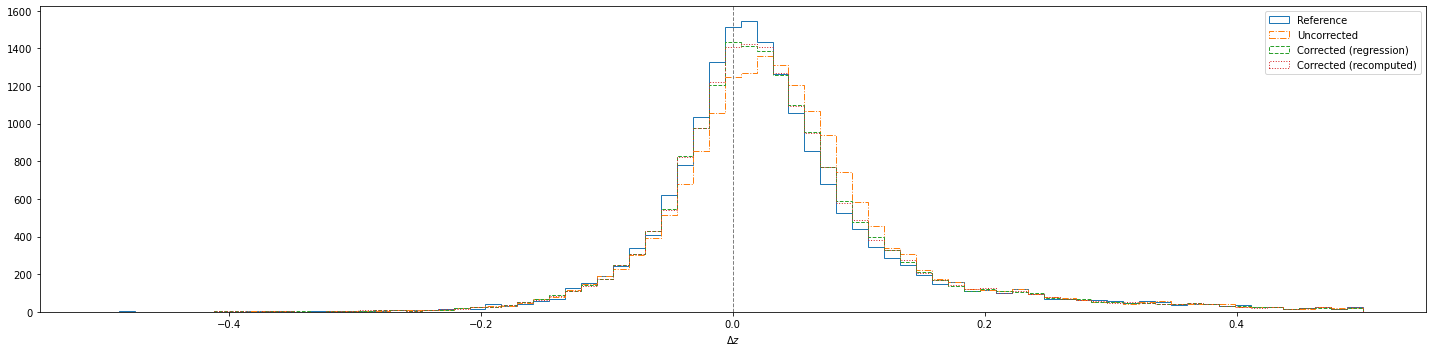

In [51]:
bins = np.linspace(-.5, .5, 80)

plt.figure(figsize=(20, 5))
plt.hist(ref_c['z'] - ref_c['REDSHIFT_MEAN'], bins=bins, histtype='step', label='Reference', linestyle='-')
plt.hist(uncorr_c['z'] - uncorr_c['REDSHIFT_MEAN'], bins=bins, histtype='step', label='Uncorrected', linestyle='-.')
plt.hist(corr_c['z'] - corr_c['REDSHIFT_MEAN'], bins=bins, histtype='step', label='Corrected (regression)', linestyle='--')
plt.hist(corr_recomp_c['z'] - corr_recomp_c['REDSHIFT_MEAN'], bins=bins, histtype='step', label='Corrected (recomputed)', linestyle=':')
plt.axvline(0, linestyle='--', color='gray', linewidth=1)
plt.legend()
plt.xlabel('$\Delta z$')
plt.tight_layout()

plt.savefig('/home/aalvarez/Downloads/dz_shift.png')

In [65]:
(corrected_recomp['NEIGHBOR_IDS'] == corrected['NEIGHBOR_IDS']).all()

True

In [66]:
(corrected_recomp['NEIGHBOR_IDS'] == not_corrected['NEIGHBOR_IDS']).all()

True

In [68]:
assert (reference['ID'] == corrected['ID']).all()

In [74]:
matching = []
for i in range(len(reference)):
    matching.append(np.in1d(reference['NEIGHBOR_IDS'][i], corrected['NEIGHBOR_IDS'][i]).sum())

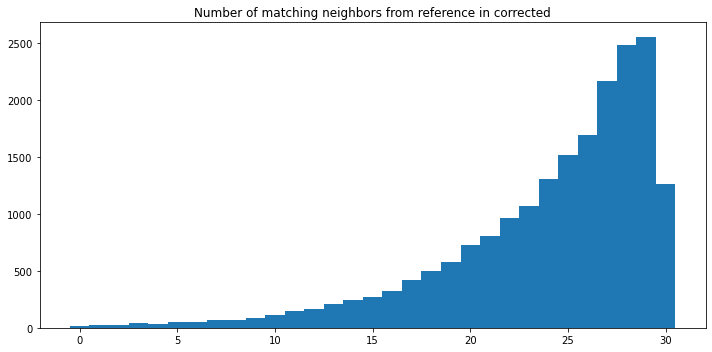

In [85]:
plt.figure(figsize=(10, 5))
plt.hist(matching, bins=np.arange(-0.5, 30.6))
plt.title('Number of matching neighbors from reference in corrected')
plt.tight_layout()
plt.savefig('/home/aalvarez/Downloads/matching_nn.png')

In [136]:
ordered_nn = np.take_along_axis(reference['NEIGHBOR_IDS'], np.flip(np.argsort(reference['NEIGHBOR_WEIGHTS'], axis=1), axis=1), axis=1)

In [140]:
first_match = []
for i in range(len(ordered_nn)):
    assert np.in1d(ordered_nn[i], reference['NEIGHBOR_IDS'][i]).all()
    nz = np.nonzero(np.in1d(ordered_nn[i], corrected['NEIGHBOR_IDS'][i]))[0]
    if len(nz):
        first_match.append(nz[0]+1)
    else:
        first_match.append(0)

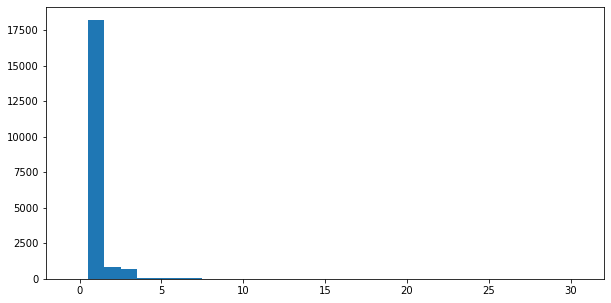

In [146]:
plt.figure(figsize=(10, 5))
plt.hist(first_match, bins=np.arange(-0.5, 30.6))
plt.show()